# Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

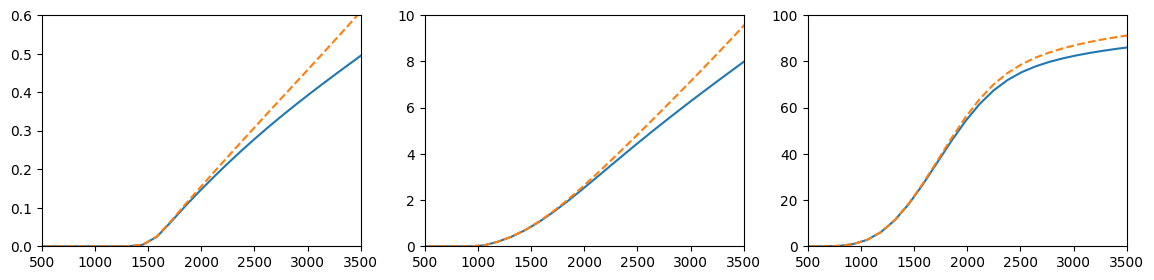

In [32]:
mat = "W"
durs = ["ns", 'us', "ms"]
E_maxs = [10.2e3, 160e3, 3.8e6]
E_dt = 1.5
eta_tr = 1e-2
phi = 1

fig, axs = plt.subplots(1, 3, figsize=(14,3), sharex=True)

def integrate_flux(t, F):
    return np.trapz(F, x=t)

for i in range(3):
    N_des_soret = np.zeros(25)
    N_des_no_soret = np.zeros(25)
    T_max_soret = np.zeros(25)
    T_max_no_soret = np.zeros(25)

    for j in range(1, 26):
        E = E_maxs[i] * j / 25

        name_pattern = f"{mat}_{durs[i]}_E{E/1e6:.5f}MJ_Edt{E_dt:.5f}eV_eta{-np.log10(eta_tr):.5f}_phi{-np.log10(phi):.5f}"

        fluxes_soret = np.loadtxt("./results_soret/fluxes_" + name_pattern + "_wSoret.csv", delimiter=",")
        fluxes_no_soret = np.loadtxt("./results_soret/fluxes_" + name_pattern + "_woSoret.csv", delimiter=",")

        data_soret = np.loadtxt("./results_soret/data_" + name_pattern + "_wSoret.csv", delimiter=",", skiprows=1)
        data_no_soret = np.loadtxt("./results_soret/data_" + name_pattern + "_woSoret.csv", delimiter=",", skiprows=1)

        T_max_soret[j-1] = data_soret[:,3].max()
        T_max_no_soret[j-1] = data_no_soret[:,3].max()        
        
        N_des_soret[j-1] = integrate_flux(fluxes_soret[:,0], fluxes_soret[:, 1]+fluxes_soret[:, 2])
        N_des_no_soret[j-1] = integrate_flux(fluxes_no_soret[:,0], fluxes_no_soret[:, 1]+fluxes_no_soret[:, 2])

    axs[i].plot(T_max_no_soret, N_des_no_soret/(10e-6*1e-2*6.31e28)*100)
    axs[i].plot(T_max_soret, N_des_soret/(10e-6*1e-2*6.31e28)*100, ls="dashed")

axs[0].set_xlim(500, 3500)
axs[0].set_ylim(0, 0.6)
axs[1].set_ylim(0,10)
axs[2].set_ylim(0,100)
plt.show()

In [ ]:
data = np.loadtxt()